In [75]:
import pandas as pd
import numpy as np

!mkdir data

from google.colab import drive
drive.mount('/content/drive')

mkdir: cannot create directory ‘data’: File exists
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
zip = zipfile.ZipFile('drive/MyDrive/5291Project/archive.zip')
zip.extractall()

In [76]:
data_US = pd.read_csv("US_youtube_trending_data.csv")
data_US.head(5)
import json #import data using python json module
with open('US_category_id.json','r') as f:
    category_data_us= json.loads(f.read())
US_cat = pd.json_normalize(category_data_us,record_path='items')
US_cat['id']= US_cat['id'].astype(int)
data_US = data_US.merge(US_cat,how ='left',left_on= 'categoryId',\
                                 right_on='id').rename(columns= {'snippet.title':'category_name'})
data_US.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,kind,etag,id,category_name,snippet.assignable,snippet.channelId
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,...,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,youtube#videoCategory,QMEBz6mxVdklVaq8JwesPEw_4nI,22,People & Blogs,True,UCBR8-60-B28hp2BmDPdntcQ
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,...,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",youtube#videoCategory,I3IL9xGIM3MsULlqR4tvCsEKv98,20,Gaming,True,UCBR8-60-B28hp2BmDPdntcQ
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,...,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,youtube#videoCategory,Qi1csjh-POReitZEbR7CUw7dmao,24,Entertainment,True,UCBR8-60-B28hp2BmDPdntcQ
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,...,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,...,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,youtube#videoCategory,gYzt8dB8mlod-84ipMtjynYe9xU,26,Howto & Style,True,UCBR8-60-B28hp2BmDPdntcQ


In [77]:
import pandas as pd
import numpy as np
import warnings
import regex as re
warnings.filterwarnings('ignore')#to filter all the warnings
import seaborn as sns
pd.set_option('float_format', '{:.4f}'.format)# to keep the float values short
# Import for wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import fot plotly
import plotly.express as px

In [78]:
data_US = data_US.drop(columns=['thumbnail_link','kind','etag','id','snippet.assignable','snippet.channelId','channelId'], axis=1)

In [79]:
data_US.dropna(inplace=True)
data_US.shape

(116033, 15)

In [80]:
data_US.drop(columns=['comments_disabled','ratings_disabled'],axis=1,inplace=True)

In [81]:
data_US.drop(columns=['description'],axis=1,inplace=True)

In [82]:
data_US.drop(columns=['title'],axis=1,inplace=True)

In [83]:
data_US.drop(columns=['channelTitle'],axis=1,inplace=True)

In [84]:
data_US.drop(columns=['tags'], inplace=True)

In [85]:
data_US['publishedAt']=pd.to_datetime(data_US.publishedAt)
data_US['publishedAt'] = data_US['publishedAt'].dt.tz_convert(None)
data_US['trending_date']=pd.to_datetime(data_US.trending_date)
data_US['trending_date'] = data_US['trending_date'].dt.tz_convert(None)

In [86]:
data_US.head(5)
data_US.shape
#data_US.to_csv("cleaned_US.csv")

(116033, 9)

In [87]:
by_date = data_US.groupby("trending_date").sum()
by_date.head(5)

,categoryId,view_count,likes,dislikes,comment_count
trending_date,,,,,
2020-08-12,3853,418424556,24127138,897529,2389824
2020-08-13,3759,449620939,24912908,971896,2482229
2020-08-14,3715,475979689,28111570,1003417,2346411
2020-08-15,3703,520693027,28545486,1138519,2552322
2020-08-16,3490,506375578,26926409,1138492,2413534


In [55]:
pip install ruptures

     |████████████████████████████████| 991 kB 812 kB/s 


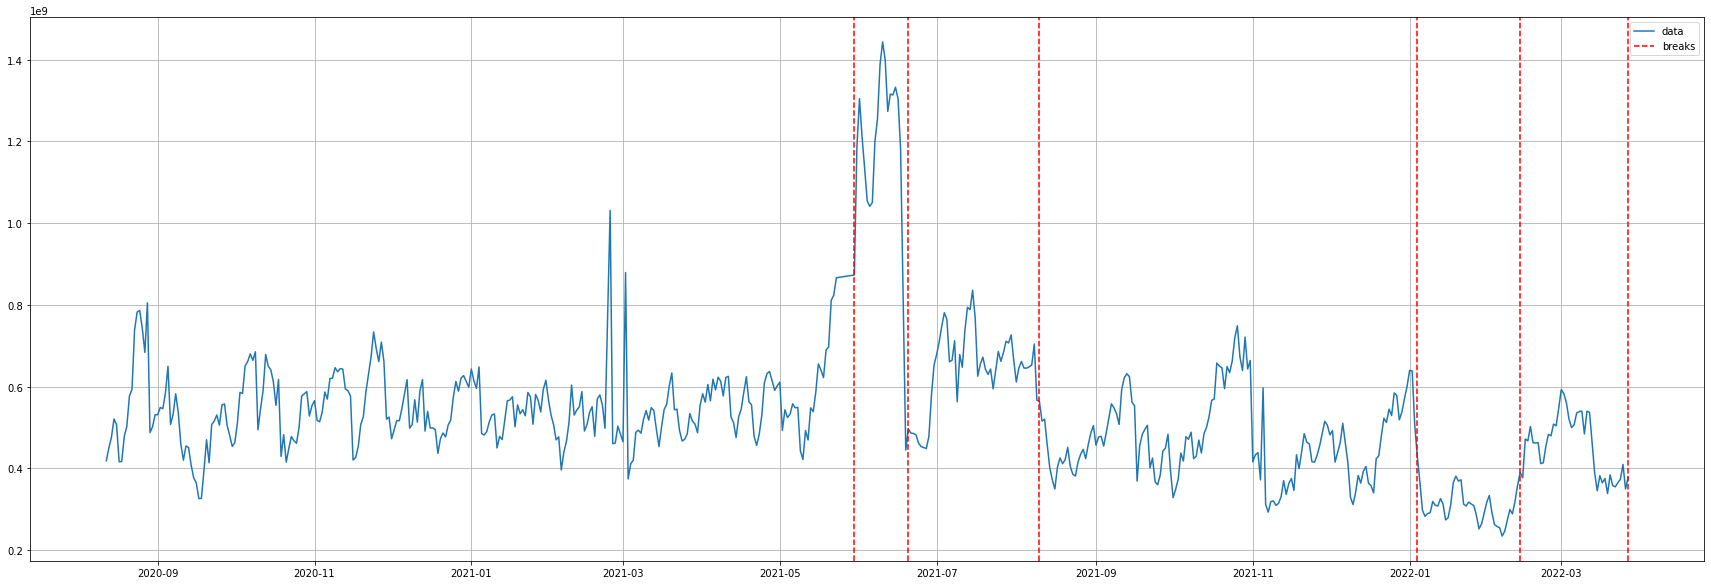

DatetimeIndex(['2021-05-30', '2021-06-20', '2021-08-10', '2022-01-04',
               '2022-02-13', '2022-03-27'],
              dtype='datetime64[ns]', freq=None)


In [56]:
import matplotlib.pyplot as plt
import ruptures as rpt

ts=by_date.view_count
y=np.array(ts.tolist())



model = rpt.Dynp(model="l1")
model.fit(y)
breaks = model.predict(n_bkps=6-1)

breaks_rpt = []
for i in breaks:
    breaks_rpt.append(ts.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)
breaks_rpt

plt.figure(figsize=(30,10))
plt.plot(ts, label='data')
print_legend = True
for i in breaks_rpt:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()
print(breaks_rpt)



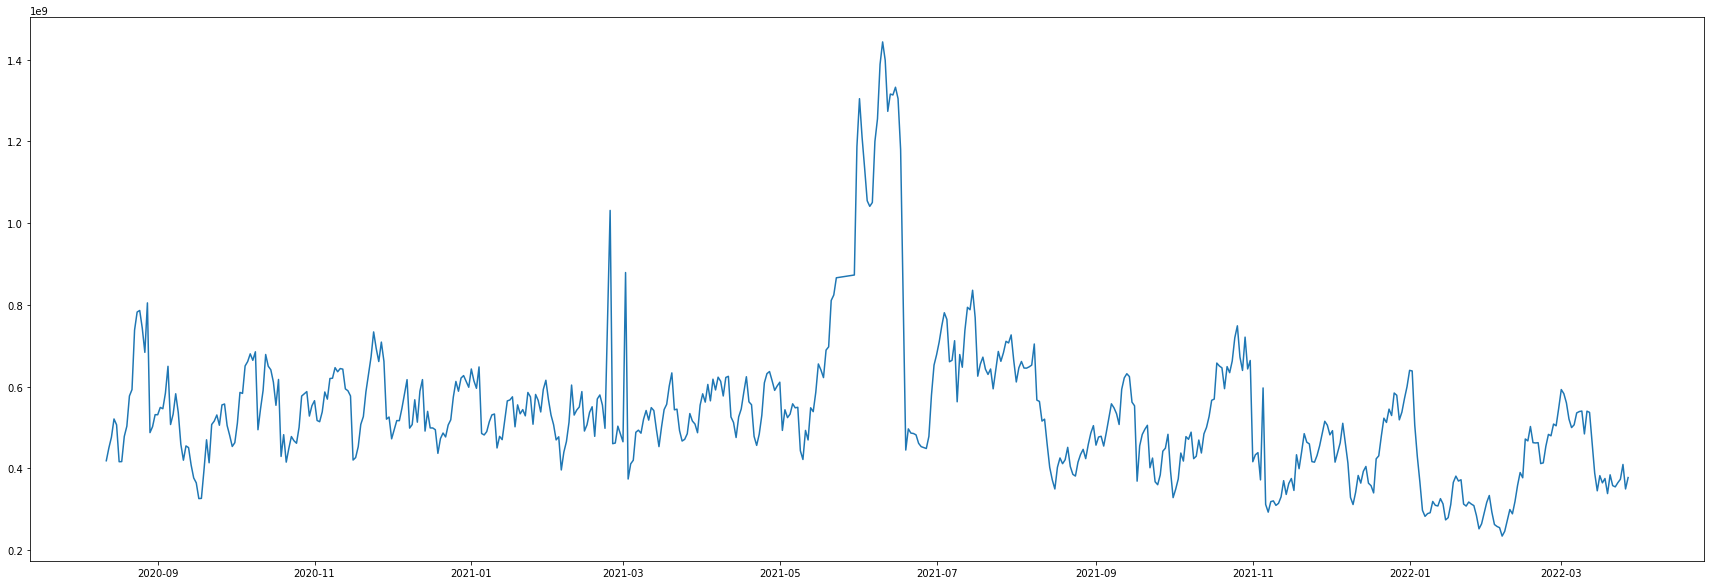

In [ ]:
plt.figure(figsize=(30,10))
plt.plot("view_count", data=by_date)
#plt.plot(by_date.dislikes/by_date.likes,data=by_date)

In [88]:
results = pd.DataFrame()
log_data = data_US

In [94]:
log_data.likes = np.log(data_US.likes)
log_data.dislikes = np.log(data_US.dislikes)
log_data.view_count = np.log(data_US.view_count)
log_data.comment_count = np.log(data_US.comment_count)
log_data.dropna()
log_data = log_data[log_data.comment_count>0]

Text(0.5, 1.0, 'Comment Count')

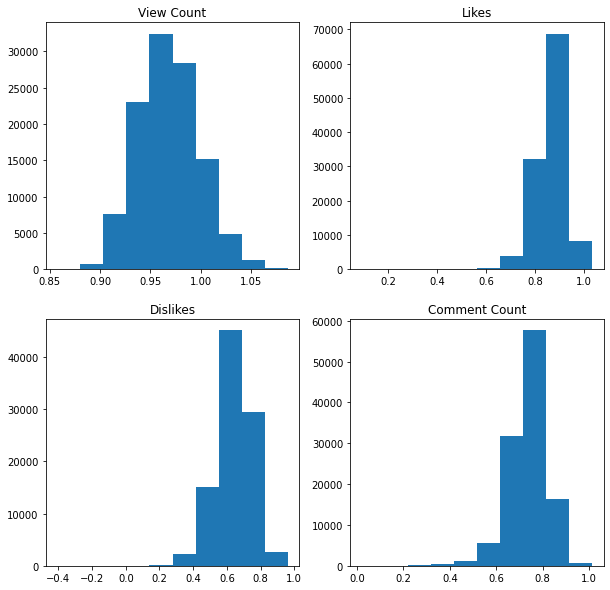

In [96]:
fig,ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].hist(log_data.view_count)
ax[0,0].set_title("View Count")
ax[0,1].hist(log_data.likes) 
ax[0,1].set_title("Likes")
ax[1,0].hist(log_data.dislikes)
ax[1,0].set_title("Dislikes")
ax[1,1].hist(log_data.comment_count)
ax[1,1].set_title("Comment Count")

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
by_category = data_US.groupby("category_name").sum()
by_category["category"] = by_category.index

model = ols('dislikes ~ category_name', data = log_data).fit()
results = sm.stats.anova_lm(model, typ=2)
results["index"] = ["dislikes~category", "Residual"]
results.set_index("index")

,sum_sq,df,F,PR(>F)
index,,,,
dislikes~category,153.0601,14.0000,341.0969,0.0000
Residual,3036.0687,94723.0000,NaN,NaN


In [64]:
model = ols('likes ~ category_name', data = log_data).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova["index"] = ["likes~category", "Residual"]
results.append(anova)

,sum_sq,df,F,PR(>F),index
category_name,153.0601,14.0000,341.0969,0.0000,dislikes~category
Residual,3036.0687,94723.0000,NaN,NaN,Residual
category_name,87.6314,14.0000,1572.5611,0.0000,likes~category
Residual,377.0332,94723.0000,NaN,NaN,Residual


In [65]:
model = ols('view_count ~ category_name', data = log_data).fit()
anova1 = sm.stats.anova_lm(model, typ=2)
anova1["index"] = ["view_count~category", "Residual"]

In [66]:
anova1.append(anova).append(results).set_index("index")

,sum_sq,df,F,PR(>F)
index,,,,
view_count~category,3.4607,14.0000,265.8106,0.0000
Residual,88.0890,94723.0000,NaN,NaN
likes~category,87.6314,14.0000,1572.5611,0.0000
Residual,377.0332,94723.0000,NaN,NaN
dislikes~category,153.0601,14.0000,341.0969,0.0000
Residual,3036.0687,94723.0000,NaN,NaN
